# Capstone 2 EDA
Mental health issues and seeking help has become so stigmatized in the world especially for those in the tech industry. I wanted to observe how mental health is dealt with in the tech industry, I want to see graphically and statistically who commonly seeks help and which groups of people face more interference with their mental health and their work.

In [23]:
import pandas as pd
import numpy as np
import scipy.stats as st
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
df = pd.read_csv('../data/therapy_data_cleaned.csv')
df.head()

,Unnamed: 0,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,1,2014-08-27 11:29:37,44,Male,United States,IN,NaN,No,No,Rarely,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2,2014-08-27 11:29:44,32,Male,Canada,Not American,NaN,No,No,Rarely,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,3,2014-08-27 11:29:46,31,Male,United Kingdom,Not American,NaN,Yes,Yes,Often,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


In [25]:
df.shape

(1259, 28)

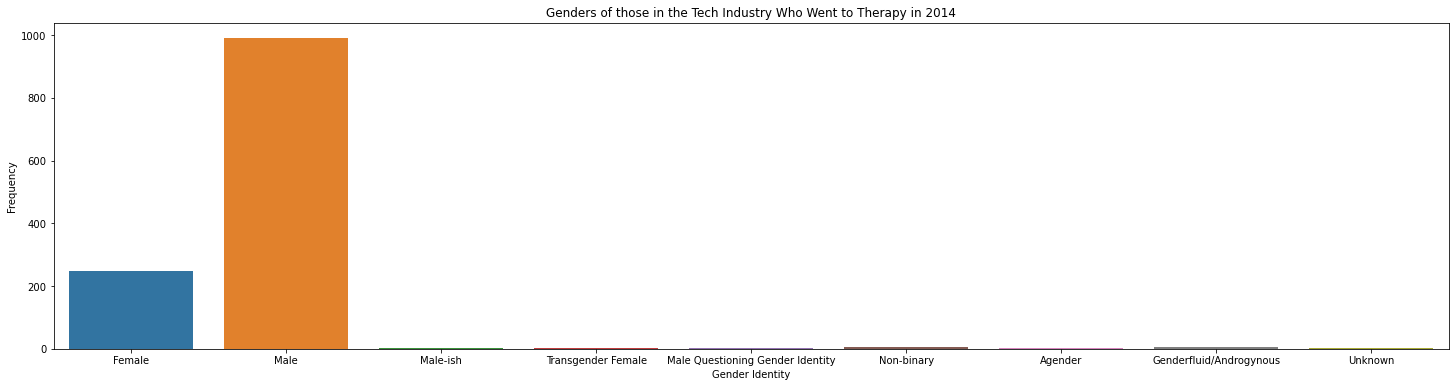

In [26]:
#analysis of gender identities who seek therapy
plt.figure(figsize=(25,6))
sns.countplot(df['Gender'])
plt.xlabel('Gender Identity')
plt.ylabel('Frequency')
plt.title('Genders of those in the Tech Industry Who Went to Therapy in 2014')
plt.show()

Males are widely disproportionate to females, so I want to drop some and resample so we have a more even dataset

In [27]:
#remove some of the males to even out the study
to_remove = np.random.choice(df[df['Gender']=='Male'].index,size=750,replace=False)
df_resample = df.drop(to_remove)

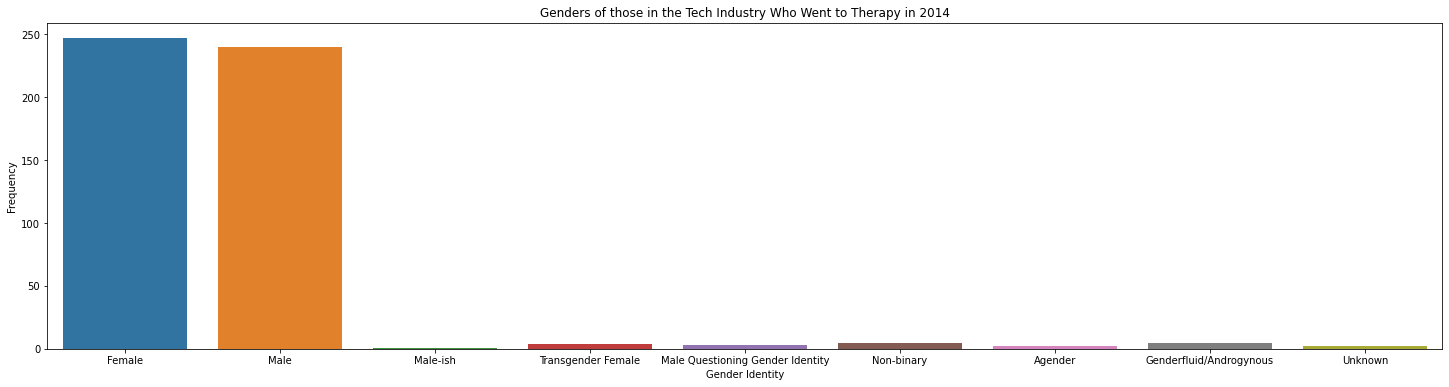

In [28]:
#redo the countplot
plt.figure(figsize=(25,6))
sns.countplot(df_resample['Gender'])
plt.xlabel('Gender Identity')
plt.ylabel('Frequency')
plt.title('Genders of those in the Tech Industry Who Went to Therapy in 2014')
plt.show()

Those with gender identities outside the binary make up a very small portion of the data, so I will primarily focus on cisgender males and females

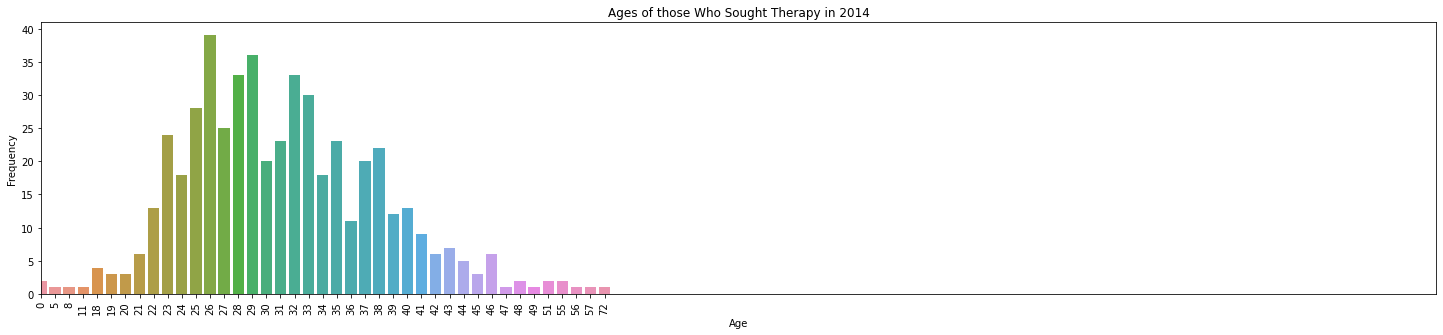

In [29]:
plt.figure(figsize=(25,5))
sns.countplot(df_resample['Age'])
plt.xticks(rotation=90)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.xlim(0,99)
plt.title('Ages of those Who Sought Therapy in 2014')
plt.show()

The ages of people in this study seem to be relatively normally distributed (I can check this out when I analyze my data's statistics using a hypothesis test)

Text(0.5, 1.0, 'People who seek Therapy Based on Country')

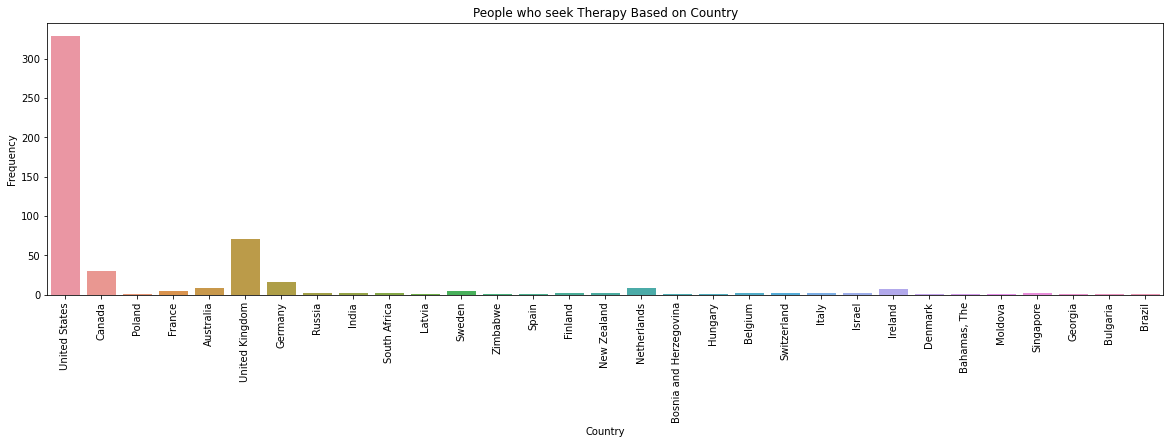

In [30]:
#make a countplot to observe by country
plt.figure(figsize=(20,5))
plt.xticks(rotation=90)
sns.countplot(df_resample['Country'])
plt.xlabel('Country')
plt.ylabel('Frequency')
plt.title('People who seek Therapy Based on Country')

Majority of the participants of this study are from the US, so I will not include Countries as a part of the study, I will look primarily at gender and age

# Mental Health and Age
I want to see how age of those in the tech industry influences their mental health
## Work interference by age

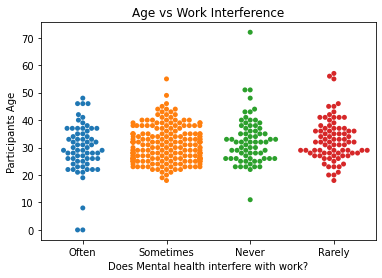

In [31]:
#create a swarmplot comparing work interference of age of participants in the study
sns.swarmplot(data = df_resample, x='work_interfere', y='Age')
plt.xlabel('Does Mental health interfere with work?')
plt.ylabel('Participants'' Age')
plt.title('Age vs Work Interference')
plt.show()

Work seems to most often interfere with those who are in their 20s to 40s, it also sometimes interferes with those who are in the same age group. People who rarely experience work interference due to mental health struggles. Usually those who face work interference are those 60 and under, as it is seen here that those older than 60 never face work interference because of their mental state.
## Mental Health Consequences by Age 

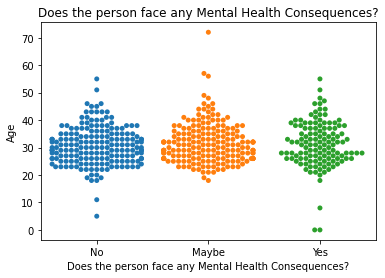

In [32]:
#create a swarmplot comparing mental health consequence by age of participants in the study
sns.swarmplot(data = df_resample, x='mental_health_consequence', y='Age')
plt.xlabel('Does the person face any Mental Health Consequences?')
plt.ylabel('Age')
plt.title('Does the person face any Mental Health Consequences?')
plt.show()

# Mental Health and Gender
I want to compare work interference, mental health consequences, family history, and whether they actually seek treatment between males and females (there is not enough data about other gender identities to include them in this study). I am mainly using countplots/histograms, as this data is highly qualitative

In [33]:
gender_fem = df_resample.loc[df.Gender.str.contains('Female'),:]
gender_male = df_resample.loc[df.Gender.str.contains('Male'),:]

## Gender and Work Interference
Do males and females feel that their mental state affects their work?

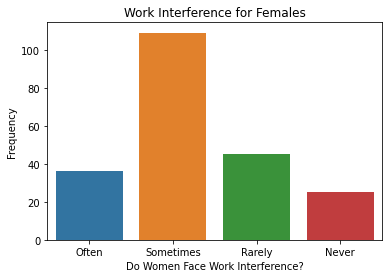

In [34]:
sns.countplot(gender_fem['work_interfere'])
plt.xlabel('Do Women Face Work Interference?')
plt.ylabel('Frequency')
plt.title('Work Interference for Females')
plt.show()

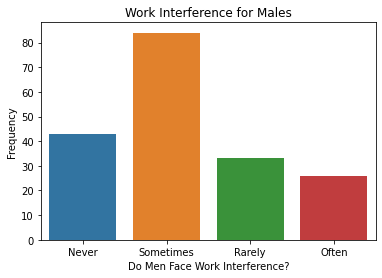

In [35]:
sns.countplot(gender_male['work_interfere'])
plt.xlabel('Do Men Face Work Interference?')
plt.ylabel('Frequency')
plt.title('Work Interference for Males')
plt.show()

## Mental Health Consequences
Exploration of if males and females feel that talking to their co-workers and superiors will cause tension in the workplace

Compared to males, females seem to find that their mental health interferes with their work as more said often or sometimes more than men did. The 'rarely' option was selected by males and females about the same number of times

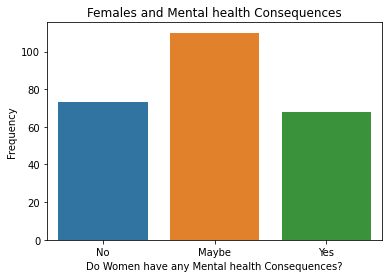

In [36]:
sns.countplot(gender_fem['mental_health_consequence'])
plt.xlabel('Do Women have any Mental health Consequences?')
plt.ylabel('Frequency')
plt.title('Females and Mental health Consequences')
plt.show()

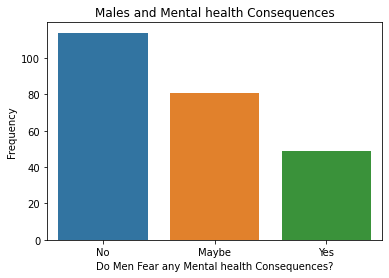

In [37]:
sns.countplot(gender_male['mental_health_consequence'])
plt.xlabel('Do Men Fear any Mental health Consequences?')
plt.ylabel('Frequency')
plt.title('Males and Mental health Consequences')
plt.show()

About half of males in this sample of the technology industry do not feel like discussing their mental health at work would have any consequences, some feel there may be consequences, and about a quarter of them do not feel there would be any consequences. When observing females, about half of them said they do feel like they would face consequences for discussing their mental health issues in the workplace, approximately a quarter of them said they would face consequences.

## Treatment 
Who is actually going to therapy?

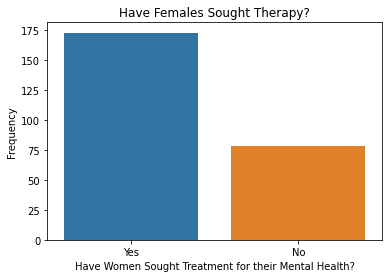

In [38]:
sns.countplot(gender_fem['treatment'])
plt.xlabel('Have Women Sought Treatment for their Mental Health?')
plt.ylabel('Frequency')
plt.title('Have Females Sought Therapy?')
plt.show()

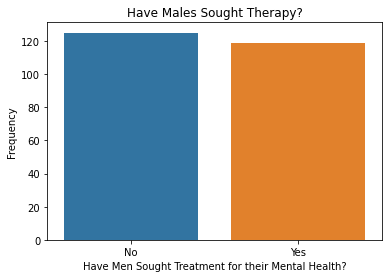

In [39]:
sns.countplot(gender_male['treatment'])
plt.xlabel('Have Men Sought Treatment for their Mental Health?')
plt.ylabel('Frequency')
plt.title('Have Males Sought Therapy?')
plt.show()

Both men and women go to therapy, but it seems that men are split on whether to go to therapy as just about 15-20 more men have not gone to therapy, than those who have gone to therapy. When observing women, over twice as many women have sought out therapy than those who have not. 

## Who goes to Therapy by Age and Gender?

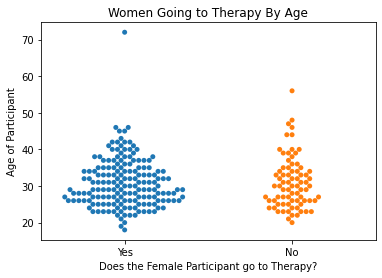

In [40]:
sns.swarmplot(data = gender_fem, x='treatment', y='Age')
plt.xlabel('Does the Female Participant go to Therapy?')
plt.ylabel('Age of Participant')
plt.title('Women Going to Therapy By Age')
plt.show()

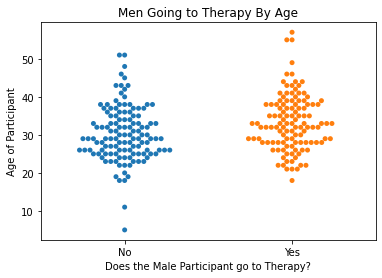

In [41]:
sns.swarmplot(data = gender_male, x='treatment', y='Age')
plt.xlabel('Does the Male Participant go to Therapy?')
plt.ylabel('Age of Participant')
plt.title('Men Going to Therapy By Age')
plt.show()

When observing my data, it seems as though of those in the technology industry, females are more likely to fear  consequences when talking to their coworkers, are more likely to seek therapy, and they feel like their mental health affects their work life more than they do for males. To confirm these speculations, I need to perform statistical analysis.

# Statistical Analysis
Let's try seeing if there's a normal distribution between males/females who go to therapy and age
Null hypothesis: There is a normal distribution of ages who go to therapy
Alternate Hypothesis: There is not a normal distribution among those who go to therapy by age

In [46]:
#let's try full dataset regardless of gender
therapy_goers = df_resample[df_resample['treatment']=='Yes']['Age']

In [47]:
therapy_normal = stats.normaltest(therapy_goers)
print(therapy_normal)

NormaltestResult(statistic=43.74812168063197, pvalue=3.1638514211598006e-10)


In [42]:
fem_therapy = gender_fem[gender_fem['treatment'] == 'Yes']['Age']
male_therapy = gender_male[gender_male['treatment'] == 'Yes']['Age']

In [43]:
fem_normal = stats.normaltest(fem_therapy)
print(fem_normal)

NormaltestResult(statistic=75.82712977705212, pvalue=3.422535642758575e-17)


In [44]:
male_normal = stats.normaltest(male_therapy)
print(male_normal)

NormaltestResult(statistic=9.02647688925039, pvalue=0.010962899882663501)


When observing the p-values for overall how much the age affects who goes to therapy, they are all under 0.05, which means the results are statistically significant and we can reject the null hypotheses that the distribution of ages among those who go to therapy is normally distributed, since these p values are extremely low (closer to 0 for females and all genders)

Text(0, 0.5, 'Frequency')

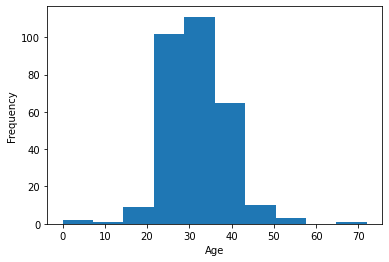

In [49]:
#create a histogram to observe the distribution of ages of those who go to therapy
plt.hist(therapy_goers)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Ages of those Who Go to Therapy')

Text(0.5, 1.0, 'Ages of those Who Go to Therapy (Female)')

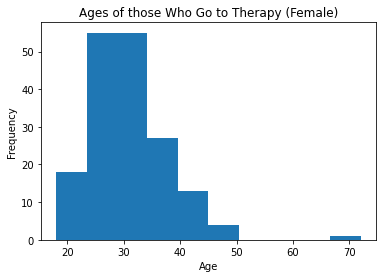

In [50]:
plt.hist(fem_therapy)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Ages of those Who Go to Therapy (Female)')

Text(0.5, 1.0, 'Ages of those Who Go to Therapy(Male)')

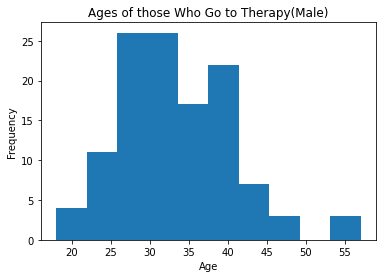

In [52]:
plt.hist(male_therapy)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Ages of those Who Go to Therapy(Male)')